<a href="https://colab.research.google.com/github/itishri917/Telecom-customer-churn-prediction/blob/master/Iti_ARTG_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**INTRODUCTION**

NAME : Iti shri Kotiyal

Email : kotiyal.itishri@gmail.com
###ABSTRACT
Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers which results in revenue loss for telecom service providers. Customer churn analysis is one of the key business metrics for service providers because the cost of retaining an existing customer is far less than acquiring a new one. In this project I am analyzing IBM Sample Dataset that has information about Telco customers and if they left the company or not. The results of this analysis will help in understanding the factors that have a significant impact on customer churn rate and it will also assist in finding the most suitable algorithm for churn predictions.


### PROJECT METHODOLOGY

The project is divided into six major steps:

1.   DATA INGESTION/IMPORTING
2.   DATA CLEANING AND FORMATTING
3.   LOADING DATA TO DATABASE TECHNOLOGY
4.   DATA MANIPULATION
5.   DATA ANALYSIS AND VISUALIZATION
6.   DATA PREDICTION

Each step is explained below in detail with corresponding python code.


 ### FINDINGS AND CONCLUSIONS
 After Analyzing the data through various visulaizations some of the key takeaways are :
  

*   Gender, Phone Service, and Multiple Lines and senior citizens are features that don’t have much effect on Churn
*   There is significantly high churn rate for customers with fiber optic internet service as compared to DSL. Fiber optic churn percentage is 41.86% whereas DSL churn percentage is 18.97%.
* Customers who do not use Online security service have a higher churn percentage compared to other customers.
* Customers who do not have tech support services have a higher churn rate as compared to others.
* The churn rate is higher for customers with a shorter tenure which means it is more challenging to retain new customers as compared to customers with higher tenure.
* The best algorithm for predicting customer churn value is logistic regression with an accuracy of 80.55%






##**DATA PREPARATION**

###DATA INGESTION/IMPORTING

The dataset being used for this project is from Kaggle.
The link for the dataset is given here: [Data set Link](
https://www.kaggle.com/blastchar/telco-customer-churn)

The aim is to understand the factors that contribute significantly to customer retention and predict customer behavior using predictive modelling. We can analyze all relevant customer data and develop focused customer retention programs.
The dataset contains 7043 rows, each row represents a customer, columns contains customer’s attributes such as :

*   Gender
*   Tenure
*   Type of contract
*   Payment method
*   Monthly charges
*   Total charges
*   Services availed
*   Churn indicator

In this step I am importing data from a CSV file and storing it in a python data frame.

*   Upload the CSV file to google drive
*   Mount your google drive


In [ ]:

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/My Drive/Telco-Customer-Churn.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Let's Explore the dataset before cleaning

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
## Number of rows and columns

df.shape

(7043, 21)

###DATA CLEANING AND FORMATTING

In this step I will clean the data by removing null values from the dataset and also check for any anomalies in the data. I will also format the data which involves modifying the data to make it suitable for analysis and prediction.
Since a lot of columns have very few unique values we will change their data type from string to category, converting those columns such as gender, payment method , contract, Internet service to category will save memory 

In [ ]:
## Finding null values 

df.info()

## Counting unique values of each column

df.nunique(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:

# df = df.astype({ 'gender': 'category', 'SeniorCitizen': 'Bool', 'Partner': 'str', 'Dependents': 'str',
#       'tenure':'int', 'PhoneService':'str', 'MultipleLines':'category', 'InternetService':'category',
#       'OnlineSecurity':'str', 'OnlineBackup':'str', 'DeviceProtection':'str', 'TechSupport':'str',
#       'StreamingTV':'category', 'StreamingMovies':'category', 'Contract':'category', 'PaperlessBilling':'str',
#      'PaymentMethod':'category', 'MonthlyCharges':'float', 'TotalCharges' : 'float' ,'Churn':'str'})'''
     

The above mentioned command throws an error "ValueError: could not convert string to float" which means there are null values in columns that are being converted to float so we will find and drop those values in the next step. We can use the below written code to convert those blanks to NaN values first and then drop them.

In [ ]:
import numpy as np


df["TotalCharges"].replace(' ',np.NaN, inplace=True )

In [ ]:
df['TotalCharges'].sort_values()

105      100.2
4459    100.25
1723    100.35
2124     100.4
2208     100.8
         ...  
3826       NaN
4380       NaN
5218       NaN
6670       NaN
6754       NaN
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
## Dropping NaN values 

df.dropna(subset=["TotalCharges"], inplace=True)

In [ ]:
## Changing data types after removing blanks from total charges

df = df.astype({ 'gender': 'category', 'SeniorCitizen': 'int', 'Partner': 'str', 'Dependents': 'str',
       'tenure':'int', 'PhoneService':'str', 'MultipleLines':'str', 'InternetService':'category',
       'OnlineSecurity':'str', 'OnlineBackup':'str', 'DeviceProtection':'str', 'TechSupport':'str',
       'StreamingTV':'str', 'StreamingMovies':'str', 'Contract':'category', 'PaperlessBilling':'str',
       'PaymentMethod':'category', 'MonthlyCharges':'float', 'TotalCharges' : 'float' ,'Churn':'str'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

###LOADING DATA TO DATABASE TECHNOLOGY

In this step I am Loading data in the data frame to SQLite database so that we can run queries on the data. The data will be converted to a file with .db extension and it will be stored in the google drive from where it can be downloaded and imported in SQLite database application.

The data file will be saved as **'Telco_data.db'** , if new data is added to the dataframe we can replace the old data file with the new one by using **if_exists="replace"**

In [ ]:

import sqlite3
conn= sqlite3.connect('Telco_data.db')
c= conn.cursor()
df.to_sql("Custdata", conn, if_exists="replace")



To fetch data from the Custdata table we can use the below mentioned commands.
This helps you to execute SQL queries and fetch results using python.

In [ ]:
#All the results from select query will be stored in the cursor cinfo

cinfo = c.execute("Select * from Custdata where customerId='5129-JLPIS'")
type(cinfo)

sqlite3.Cursor

In [ ]:
## To fetch fetch row from the cursor we can use fetchone() function, to fetch all rows use function fetchall()
cinfo.fetchone()

(14,
 '5129-JLPIS',
 'Male',
 0,
 'No',
 'No',
 25,
 'Yes',
 'No',
 'Fiber optic',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Month-to-month',
 'Yes',
 'Electronic check',
 105.5,
 2686.05,
 'No')

If new customers join and we need to add their data to our existing database table we can do it
easily using below mentioned commands, this gives us flexibility to add ne data everytime more customers
join and use that data in our analysis

In [ ]:
## Current customer count is : 7032

ccount= c.execute("Select count(*) from Custdata")

ccount.fetchone() 


## New customer data is stored in a csv file called "New customer data"

newcdata = pd.read_excel("/content/drive/My Drive/New customer data.xlsx")



In [ ]:
newcdata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1452-AAAA,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
1,6713-BBBBB,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
2,7892-CCCC,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
3,6388-DDDD,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
4,9763-EEEE,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
5,7469-FFFF,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
6,8091-GGGG,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
7,0280-HHHH,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
8,5129-IIII,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
9,3655-JJJJ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [ ]:
## Append new data frame to existing DB table

newcdata.to_sql("Custdata", conn, if_exists="append")

ccount= c.execute("Select count(*) from Custdata")

ccount.fetchone() 

(7044,)

In [ ]:
## To convert the table data to a data frame for further analysis and visualization:

cinfo = c.execute("Select * from Custdata")
combined_dataframe = pd.DataFrame(cinfo.fetchall(), columns =['Index', 'customerID' ,'gender',	'SeniorCitizen',	'Partner',
                                                              'Dependents',	'tenure' ,	'PhoneService',	
                                                              'MultipleLines',	'InternetService'	, 'OnlineSecurity',	
                                                              'OnlineBackup'	, 'DeviceProtection',	'TechSupport',	
                                                              'StreamingTV',	'StreamingMovies',	'Contract', 	
                                                              'PaperlessBilling',	'PaymentMethod'	,'MonthlyCharges',	
                                                              'TotalCharges', 'Churn'])

combined_dataframe.drop("Index", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


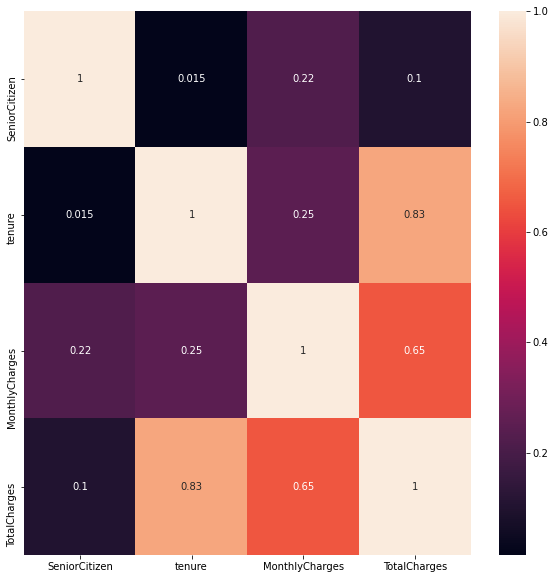

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

## Plotting a heat map to find correlation between different attributes of the data set

plt.figure(figsize=(10,10))
sns.heatmap(combined_dataframe.corr(), annot=True)



To find correlation the columns should have continuous values and not boolean or string so conversion is needed. To convert boolean values to integer a function is created, this function will replace True with 1 and False with 0

In [ ]:
# function to perform changes 

def convert(value):
  if value == 'Yes':
    return 1
  else:
    return 0

combined_dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,0280-HHHH,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
7040,5129-IIII,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
7041,3655-JJJJ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
7042,8191-KKKK,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No


In [ ]:
## Applying the function to each column that has YES , NO values

combined_dataframe["Partner"] = combined_dataframe["Partner"].apply(convert)
combined_dataframe["Dependents"] = combined_dataframe["Dependents"].apply(convert)
combined_dataframe["PhoneService"] = combined_dataframe["PhoneService"].apply(convert)
combined_dataframe["MultipleLines"] = combined_dataframe["MultipleLines"].apply(convert)
combined_dataframe["OnlineSecurity"] = combined_dataframe["OnlineSecurity"].apply(convert)
combined_dataframe["OnlineBackup"] = combined_dataframe["OnlineBackup"].apply(convert)
combined_dataframe["DeviceProtection"] = combined_dataframe["DeviceProtection"].apply(convert)
combined_dataframe["TechSupport"] = combined_dataframe["TechSupport"].apply(convert)
combined_dataframe["StreamingTV"] = combined_dataframe["StreamingTV"].apply(convert)
combined_dataframe["StreamingMovies"] = combined_dataframe["StreamingMovies"].apply(convert)
combined_dataframe["PaperlessBilling"] = combined_dataframe["PaperlessBilling"].apply(convert)
combined_dataframe["Churn"] = combined_dataframe["Churn"].apply(convert)



##**DATA ANALYSIS AND VISUALIZATION**

In the data analysis phase I will run correlation to find which factors are strongly correlated to customer churn value. I will also find insights on which types of services have higher churn rate as compared to others.

In [ ]:
combined_dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,0280-HHHH,Male,0,0,0,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1
7040,5129-IIII,Male,0,0,0,25,1,0,Fiber optic,1,0,1,1,1,1,Month-to-month,1,Electronic check,105.50,2686.05,0
7041,3655-JJJJ,Female,0,1,1,69,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Credit card (automatic),113.25,7895.15,0
7042,8191-KKKK,Female,0,0,0,52,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,20.65,1022.95,0


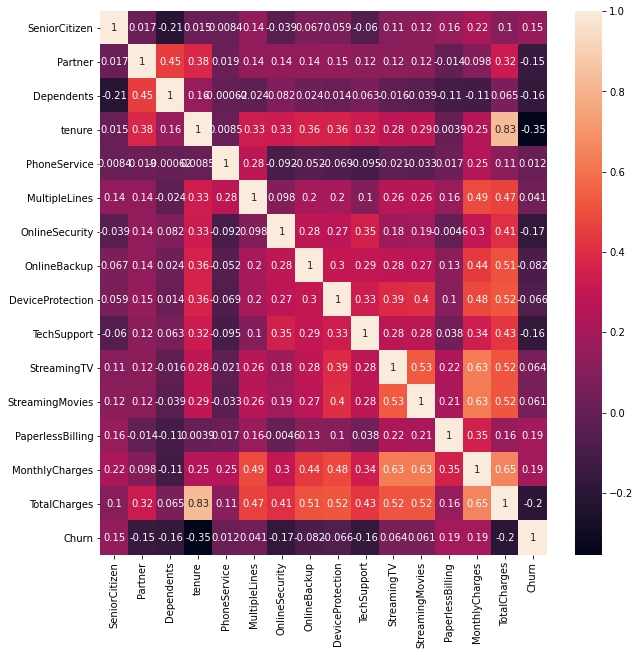

In [ ]:
## Finding correlation after converting column values to 0 and 1 instead of true false


plt.figure(figsize=(10,10))
sns.heatmap(combined_dataframe.corr(), annot=True)

From the above heat map we observed there is no strong correlation of churn rate with any of the other attributes so we will dig deeper and find out that customers of which service have a higher churn rate


In [ ]:

telco_services= combined_dataframe [ ['OnlineSecurity', 'DeviceProtection', 'StreamingMovies',
                                       'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]

telco_services

## Making 2 group of customers, one with churn = 1 (Yes) and churn= 0 (No)

grp_churn = telco_services.groupby("Churn", as_index=False)[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 
                                                             'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()

grp_churn                                                            



,Churn,OnlineSecurity,DeviceProtection,StreamingMovies,TechSupport,StreamingTV,OnlineBackup
0,0,1726,1877,1917,1732,1894,1905
1,1,295,547,820,311,816,524


Text(0.5, 1.0, 'Service vs Customers Churn')

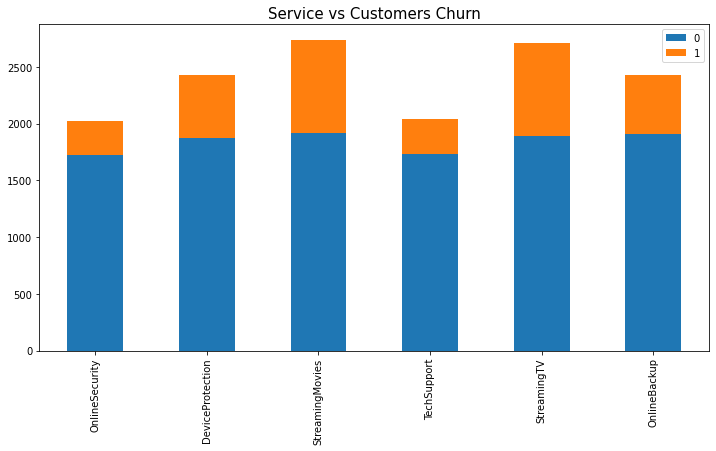

In [ ]:
ax = grp_churn.set_index('Churn').T.plot(kind='bar', stacked=True, figsize=(12,6))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Service vs Customers Churn', fontsize=15)


The stacked bar chart shown above indicates that customers using Streaming movie services and Streaming TV have a higher churn rate as compared to others.

Internet services was not included in the analysis done above because it has many subtypes that should be treated 
separately and also there are more than 78% customers who have internet service so we will analyse it separately

Text(0.5, 1.0, 'Churn By Internet Service Type')

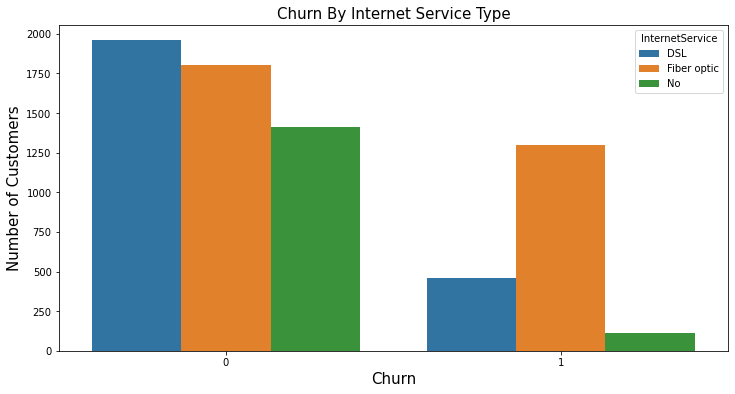

In [ ]:
internet_service_users = combined_dataframe[combined_dataframe["InternetService"] != 'No'] ## result is 5522 rows


plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="InternetService", data=combined_dataframe);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn By Internet Service Type', fontsize=15)


As per this analysis we find that there is significantly high churn rate for customers with fiber optic internet 
service as compared to DSL, before reaching to any conclusion first we should check the percentage of customers 
with churn value = 1 for both DSL and fiber optics

In [ ]:
## WE can count the total customers of each service separately or together using groupby 

combined_dataframe.groupby("InternetService")['Churn'].count() ## 3103 total customers of fiber optics, 2419 customers of DSL

FB = combined_dataframe[combined_dataframe["InternetService"]== "Fiber optic"]
DSL = combined_dataframe[combined_dataframe["InternetService"]== "DSL"]

FB_total = combined_dataframe[combined_dataframe["InternetService"]== "Fiber optic"]['customerID'].count()

DSL_total = combined_dataframe[combined_dataframe["InternetService"]== "DSL"]['customerID'].count()

FB_churn_percent = (((FB[FB["Churn"]==1]['customerID'].count())/(FB_total)) *100) # 1299 rows

DSL_churn_percent = (((DSL[DSL["Churn"]==1]['customerID'].count())/(DSL_total)) *100)

print (" Fiber optic churn percentage is : " , round(FB_churn_percent,2), "\n DSL churn percentage is ",round(DSL_churn_percent,2) )



 Fiber optic churn percentage is :  41.86 
 DSL churn percentage is  18.97


From the results of above calculation we can confirm that the churn percentage is very high for fiber optics which means even though fiber has the ability to provide 
more bandwidth over a greater distance still customers are not satisfied with the service and it needs improvement.


##**TABLEAU VISUALIZATIONS**

I am using tableau to find different trends within the data and understand the attributes that have significant effect on customer churn rate.

Below is a dashboard from Tableau which shows that features such Gender, Phone Service, and Multiple Lines and senior citizens don’t really have much effect on Churn because the percentage churn rate is almost similar for all the features.

In [ ]:
##DASHBOARD FROM TABLEAU PUBLIC

%%HTML
<div class='tableauPlaceholder' id='viz1596338791268' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;At&#47;Attributesvschurn&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Attributesvschurn&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;At&#47;Attributesvschurn&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596338791268');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The next dashboard shows the attributes with high churn percentage which means these are the services that need more attention and further analysis.
From the graphs shown below it is apparent that:


1.   Customers using fiber optic have a high churn percentage compared to DSL.
2.   Customers who do not use Online security service have a higher churn    percentage compared to other customers
3.    Customers who do not have tech support services have a higher churn rate as compared to others.



In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1596340524477' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;At&#47;Attributes2vschurn&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Attributes2vschurn&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;At&#47;Attributes2vschurn&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596340524477');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='927px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In the next visualization I will try to find how the churn value is related to tenure of customers. Tenure is the value of months for which the customer has been woth the service provider. The graph shows that as the tenure increases the churn rate decreases which means it is more challenging to retain customers as compared to old ones.

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1596324517627' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telco-customer-churn&#47;tenurevschurn&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Telco-customer-churn&#47;tenurevschurn' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telco-customer-churn&#47;tenurevschurn&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596324517627');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##**PREDICTIVE MODELLING**

Data prediction is a powerful way to predict customer churn rate. I am using different prediction algorithms for predicting the value of churn column. The aim is to achieve a high prediction accuracy. 


### DECISION TREE

Unlike R , in sklearn we can run decision tree only on numerical variables so in the first step we are using only numerical columns for predictions.

In [ ]:
## DECISION TREES

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X=combined_dataframe[['Partner',	'Dependents' ,	'tenure',	'PhoneService',	'MultipleLines',
         'MonthlyCharges', 'TotalCharges', 'OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV',
         'StreamingMovies', 'PaperlessBilling']]

Y=combined_dataframe.Churn

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
accuracy_dt = dt_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",(round(accuracy_dt, 4))*100 , "%")

Decision Tree accuracy is : 72.68 %


### RANDOM FOREST CLASSIFIER

In [ ]:
## RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()

rf_model.fit(X_train,Y_train)
accuracy_rf = rf_model.score(X_test,Y_test)
print("Random forest is :",(round(accuracy_rf, 4))*100 , "%")

Random forest is : 79.13 %


###LOGISTIC REGRESSION

In [ ]:
## LOGISTIC REGRESSION 
## In logistic regression I am using all the columns for predicting churn value

from sklearn.linear_model import LogisticRegression

X=combined_dataframe.drop('Churn', axis=1)

lr_model=LogisticRegression()

lr_model.fit(X_train,Y_train)
accuracy_lr = lr_model.score(X_test,Y_test)
print("Logistic regression accuracy is :",(round(accuracy_lr, 4))*100 , "%")


Logistic regression accuracy is : 80.55 %


From the above shown algorithms it can be seen that logistic regression gives the highest accuracy of 80.55% which means it should be the ideal choice for predicting customer churn value.

### CHALLENGES

A few challenges I faced while working on this project are:


*   Missing customer details such as their age, city, state and reason for leaving. These attributes would have helped in a better and more efficient analysis of customer behavior.
*   The data was not balanced which means the percentage of customers who left was very less compared to customers who stayed which makes the prediction biased towards the majority class. I am planning to incorporate SMOTE(Synthetic Minority Oversampling Technique) in this project to remove bias in prediction. SMOTE is a technique that solves the problem of imbalance classification by creating synthetic rows of the minority class.

